In [1]:
import os
import torch
# import torch.nn as nn
from torch.utils import data
# from torch.nn import functional as F
from torchvision import transforms
# import torchvision.models
# from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# from skimage import io, transform

import sys 
sys.path.append('..')
from dataset import NyuV2
import transforms_nyu

%matplotlib inline

In [2]:
data_path = '../data/nyu_v2/'
batch_size = 4

seed = 2
torch.manual_seed(seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([transforms_nyu.Scale(),
                               transforms_nyu.RandomRescale(380),
                               transforms_nyu.RandomCrop(224),
                               transforms_nyu.RandomHorizontalFlip(0.5)])
nyu = NyuV2(os.path.join(data_path, 'val'), transform=transform)
test_loader = data.DataLoader(nyu, batch_size=batch_size, shuffle=False)

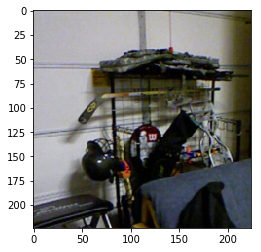

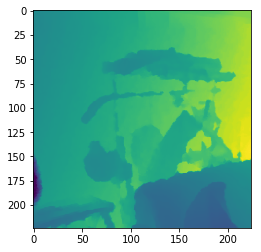

In [4]:
sample = next(iter(test_loader))
plt.imshow(sample['image'][0])
plt.figure()
plt.imshow(sample['depth'][0])

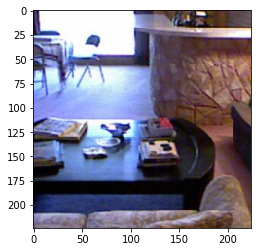

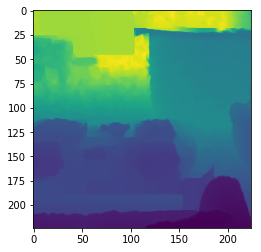

In [5]:
plt.imshow(sample['image'][3])
plt.figure()
plt.imshow(sample['depth'][3])

In [6]:
transform = transforms.Compose([transforms_nyu.Scale(),
                               transforms_nyu.RandomRescale(380),
                               transforms_nyu.RandomCrop(224),
                               transforms_nyu.RandomHorizontalFlip(0.5),
                               transforms_nyu.ToTensor()])
nyu = NyuV2(os.path.join(data_path, 'val'), transform=transform)
test_loader = data.DataLoader(nyu, batch_size=batch_size, shuffle=False)

In [7]:
sample = next(iter(test_loader))
print(sample['image'].shape)
print(sample['depth'].shape)

torch.Size([4, 3, 224, 224])
torch.Size([4, 800])


In [8]:
import pickle
img_file = '../data/nyu_v2/train/images/00000.p'
depth_file = '../data/nyu_v2/train/depths/00000.p'
img = pickle.load(open(img_file, 'rb'))
dpt = pickle.load(open(depth_file, 'rb'))

In [9]:
img.shape

(480, 640, 3)

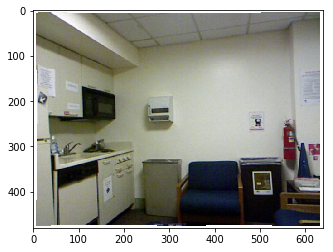

In [10]:
plt.imshow(np.fliplr(img/255))

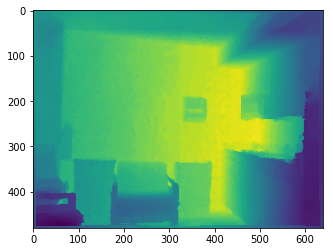

In [11]:
plt.imshow(dpt/10)